In [2]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pyarrow

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

from scipy.stats import pearsonr


## Ingest data

In [3]:
rg = pd.read_csv("ratings.csv")
rg.head()

,num,id,name,year,rank,average,bayes_average,users_rated,url,thumbnail
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...


In [4]:
# Displaying hidden columns
pd.set_option('display.max_columns', None) 

# Data ingestion
dt= pd.read_csv("./details.csv")
dt.head()



,num,id,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgameexpansion,boardgameimplementation,boardgamedesigner,boardgameartist,boardgamepublisher,owned,trading,wanting,wishing
0,0,30549,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...","['Components: Map (Global Scale)', 'Components...",['Pandemic: Gen Con 2016 Promos – Z-Force Team...,"['Pandemic Legacy: Season 0', 'Pandemic Legacy...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...",168364,2508,625,9344
1,1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,45,30,45,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Cities: Carcassonne (France)', 'Components: ...","['20 Jahre Darmstadt Spielt', 'Apothecaries (f...","['The Ark of the Covenant', 'Carcassonne für 2...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",161299,1716,582,7383
2,2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,120,60,120,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Animals: Sheep', 'Components: Hexagonal Tile...","['20 Jahre Darmstadt Spielt', 'Brettspiel Adve...","['Baden-Württemberg Catan', 'Catan Geographies...",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...",167733,2018,485,5890
3,3,68448,7 Wonders,You are the leader of one of the 7 great citie...,2010,2,7,30,30,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...","['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...","['7 Wonders: Armada', '7 Wonders: Babel', '7 W...","['7 Wonders (Second Edition)', '7 Wonders Duel...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",120466,1567,1010,12105
4,4,36218,Dominion,"&quot;You are a monarch, like your parents bef...",2008,2,4,30,30,30,13,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...","['Crowdfunding: Wspieram', 'Game: Dominion', '...","['Ancient Times (fan expansion for Dominion)',...","['Dominion (Second Edition)', 'Het Koninkrijk ...",['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",106956,2009,655,8621


In [5]:

#drop year from rg as it correlates with year in details 1:1
rg.drop('year', axis=1, inplace=True)

#rename columns from ratings for clarity
rg.rename(columns={'num': 'num_r', 'rank': 'rank_ratings', 'average': 'average_ratings', 'bayes_average': 'bayes_average_ratings'}, inplace=True)

#join the two tables
gd = rg.merge(dt, on='id')

In [6]:
# lets see if the nan values are present in the dataset
gd.isnull().sum()

num_r                          0
id                             0
name                           0
rank_ratings                   0
average_ratings                0
bayes_average_ratings          0
users_rated                    0
url                            0
thumbnail                      6
num                            0
primary                        0
description                    1
yearpublished                  0
minplayers                     0
maxplayers                     0
playingtime                    0
minplaytime                    0
maxplaytime                    0
minage                         0
boardgamecategory            283
boardgamemechanic           1590
boardgamefamily             3761
boardgameexpansion         16125
boardgameimplementation    16769
boardgamedesigner            596
boardgameartist             5907
boardgamepublisher             1
owned                          0
trading                        0
wanting                        0
wishing   

## No need to handle Nan as they fall in the categorical columns

## Year does have outliers, a simple search on the internet could detect few. We assume the data is clean for the purposes of this study. 

### The goal of the project is discovering what makes money for the creator. That is done with a new game. 
### Discovering a game that is not yet known is very unlikely.
### Simulating what made an old game successful might help, but we simply do not have enough features that describe the games. Combining with external data sources could help, or adding a richer dataset like is found on Kaggle that this one is derived from, may make us relax this requirement in a future study.

### Reasons for focusing our analysis: most data resides in recent years, covariate function needs positive numbers, and this focuses our attention to what within the creators control, and what defines success in the modern age.

Why 1945, so as to not lose too much data.

Or we can offset the year by 3500 in order to set 0 as the oldest known game.

The higher the year is a pattern noticed in the last decades. obviously it does not apply to really old classics from another era, they are classics for a reason.

In [7]:
#we will focus our analysis on games published after 1945. 
gdf = gd[gd['yearpublished'] >= 1945]

In [8]:
#lets select the categorical coluns to make some count plots
gdc = gdf.select_dtypes(include=['object'])
gdc

#drop categorical because encoding and scaling is troublesome for regression. 
# publisher might be interesting as a predictor.
gdn = gdf.drop(columns=gdc.columns)

gdn

,num_r,id,rank_ratings,average_ratings,bayes_average_ratings,users_rated,num,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,owned,trading,wanting,wishing
0,105,30549,106,7.59,7.487,108975,0,2008,2,4,45,45,45,8,168364,2508,625,9344
1,189,822,190,7.42,7.309,108738,1,2000,2,5,45,30,45,7,161299,1716,582,7383
2,428,13,429,7.14,6.970,108024,2,1995,3,4,120,60,120,10,167733,2018,485,5890
3,72,68448,73,7.74,7.634,89982,3,2010,2,7,30,30,30,10,120466,1567,1010,12105
4,103,36218,104,7.61,7.499,81561,4,2008,2,4,30,30,30,13,106956,2009,655,8621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21626,12748,296892,12749,7.37,5.531,30,21626,2020,3,9,30,20,30,8,112,8,4,32
21627,15016,217378,15017,6.61,5.517,30,21627,2016,1,5,30,15,30,10,64,1,6,21
21628,19459,18063,19460,5.00,5.488,30,21628,1970,2,4,60,60,60,10,98,7,4,5
21629,17256,10052,17257,5.80,5.505,30,21629,1989,2,4,10,10,10,5,52,4,8,13


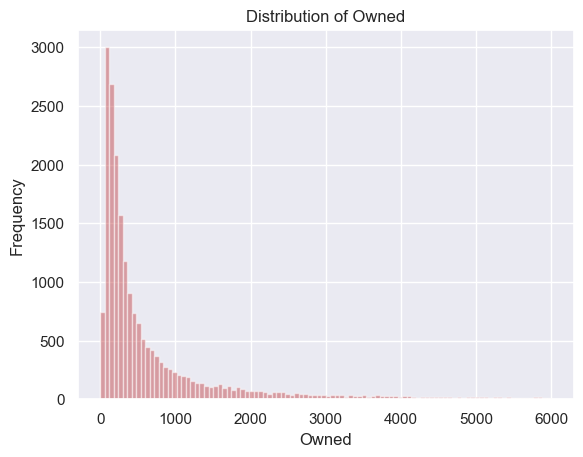

In [9]:
#distribution of owned
plt.hist(gdn['owned'], bins=100, range=(0, 6000), color='r', alpha=0.5, label='Owned')
plt.xlabel('Owned')
plt.ylabel('Frequency')
plt.title('Distribution of Owned')
plt.show()

### Top 20 owned games.
### Notice that in ~2/3 of cases it is equal to sorting by `users_rated`

In [10]:
from tabulate import tabulate

top_20_owned_games = gdf.sort_values(by='owned', ascending=False).head(20)
top_20_owned_games[["id", "name", "owned", "rank_ratings", "average_ratings", "users_rated"]]

table = top_20_owned_games[["id", "name", "owned", "rank_ratings", "average_ratings", "users_rated"]]
table_md = tabulate(table, headers='keys', tablefmt='pipe')

print(table_md)

|    |     id | name                   |   owned |   rank_ratings |   average_ratings |   users_rated |
|---:|-------:|:-----------------------|--------:|---------------:|------------------:|--------------:|
|  0 |  30549 | Pandemic               |  168364 |            106 |              7.59 |        108975 |
|  2 |     13 | Catan                  |  167733 |            429 |              7.14 |        108024 |
|  1 |    822 | Carcassonne            |  161299 |            190 |              7.42 |        108738 |
|  3 |  68448 | 7 Wonders              |  120466 |             73 |              7.74 |         89982 |
|  6 | 178900 | Codenames              |  119753 |            101 |              7.6  |         74419 |
|  8 | 173346 | 7 Wonders Duel         |  111275 |             16 |              8.11 |         69472 |
|  4 |  36218 | Dominion               |  106956 |            104 |              7.61 |         81561 |
|  5 |   9209 | Ticket to Ride         |  105748 |            19

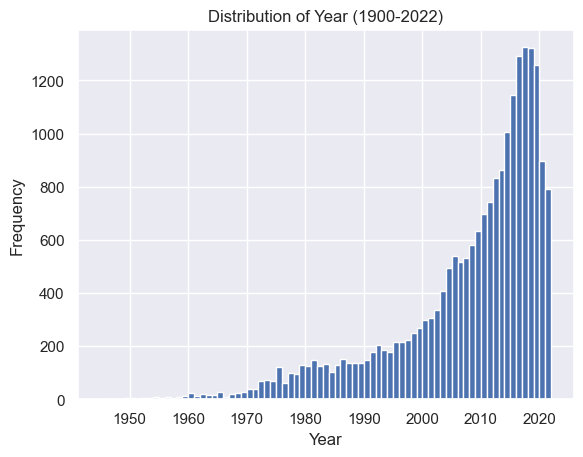

In [11]:
# Plot the distribution of yearpublished
plt.hist(gdn['yearpublished'], bins=77, range=(1945, 2022))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year (1900-2022)')
plt.show()

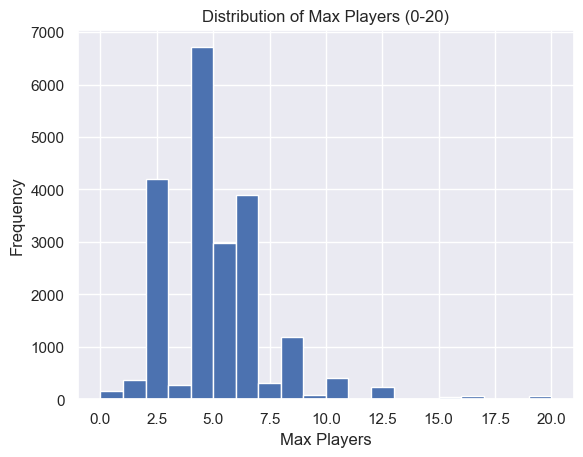

In [12]:
# Plot the distribution of maxPlayers
plt.hist(gdn['maxplayers'], bins=20, range=(0, 20))
plt.xlabel('Max Players')
plt.ylabel('Frequency')
plt.title('Distribution of Max Players (0-20)')
plt.show()


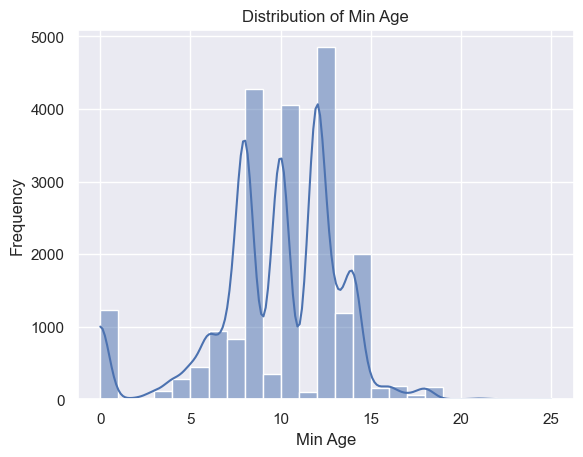

In [13]:
# Plot the distribution of minAge
sns.histplot(gdn['minage'], kde=True, bins=25)
plt.xlabel('Min Age')
plt.ylabel('Frequency')
plt.title('Distribution of Min Age')
plt.show()


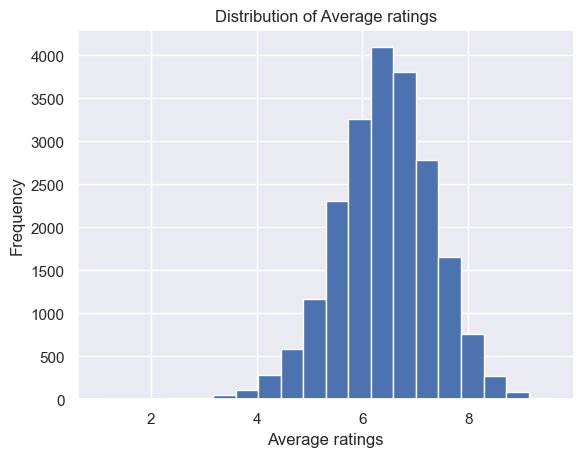

In [14]:
# Plot the distribution of average ratings
plt.hist(gdn['average_ratings'], bins=20)
plt.xlabel('Average ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Average ratings')
plt.show()

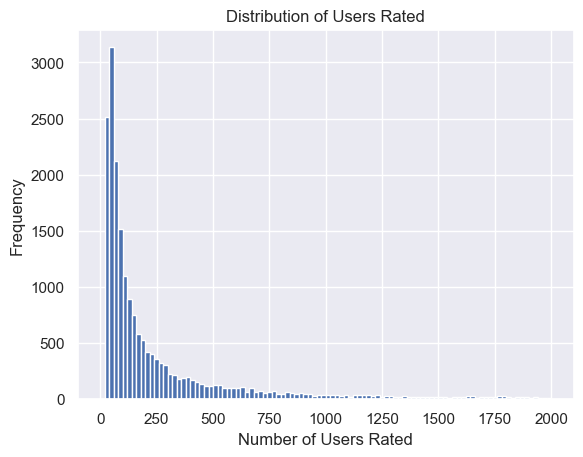

In [15]:
# Plotting the distribution of users_rated
plt.hist(gdn['users_rated'], bins=100, range=(0, 2000))
plt.xlabel('Number of Users Rated')
plt.ylabel('Frequency')
plt.title('Distribution of Users Rated')
plt.show()

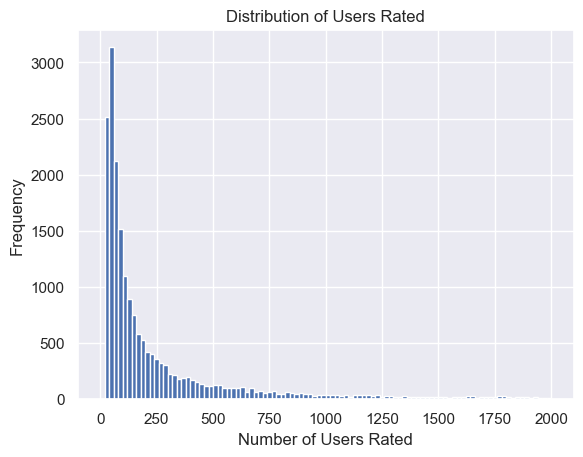

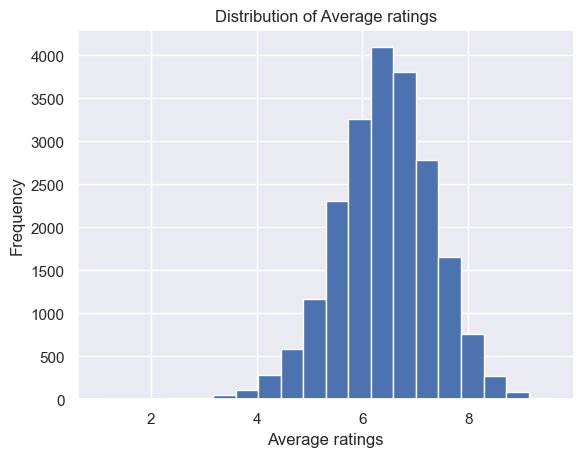

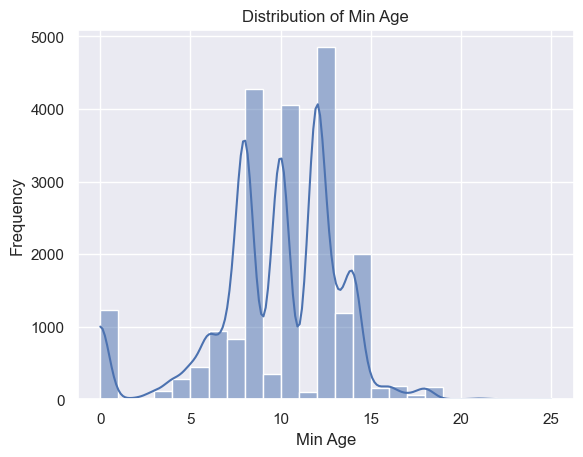

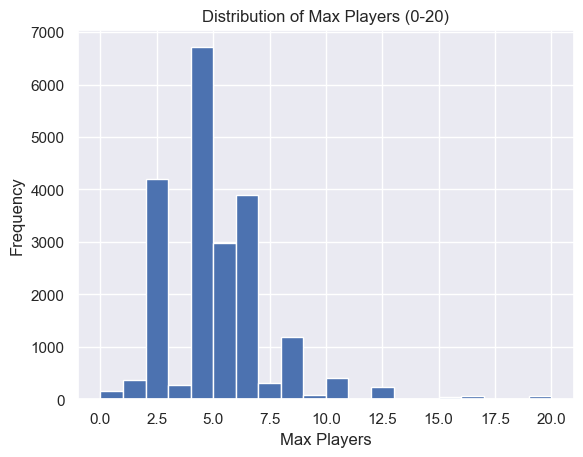

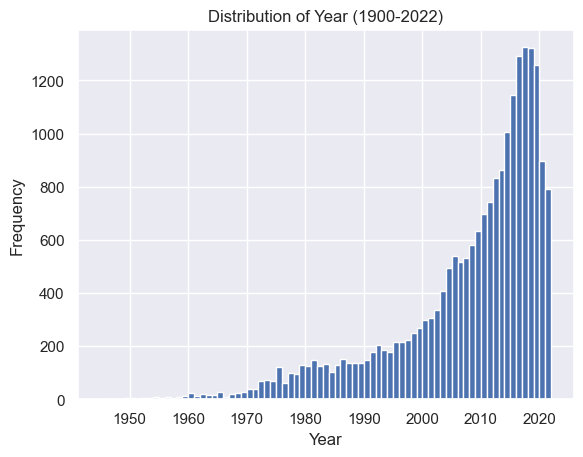

In [16]:


# Plotting the distribution of users_rated
plt.hist(gdn['users_rated'], bins=100, range=(0, 2000))
plt.xlabel('Number of Users Rated')
plt.ylabel('Frequency')
plt.title('Distribution of Users Rated')
plt.show()

# Plot the distribution of average ratings
plt.hist(gdn['average_ratings'], bins=20)
plt.xlabel('Average ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Average ratings')
plt.show()

# Plot the distribution of minAge
sns.histplot(gdn['minage'], kde=True, bins=25)
plt.xlabel('Min Age')
plt.ylabel('Frequency')
plt.title('Distribution of Min Age')
plt.show()

# Plot the distribution of maxPlayers
plt.hist(gdn['maxplayers'], bins=20, range=(0, 20))
plt.xlabel('Max Players')
plt.ylabel('Frequency')
plt.title('Distribution of Max Players (0-20)')
plt.show()

# Plot the distribution of yearpublished
plt.hist(gdn['yearpublished'], bins=77, range=(1945, 2022))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year (1900-2022)')
plt.show()



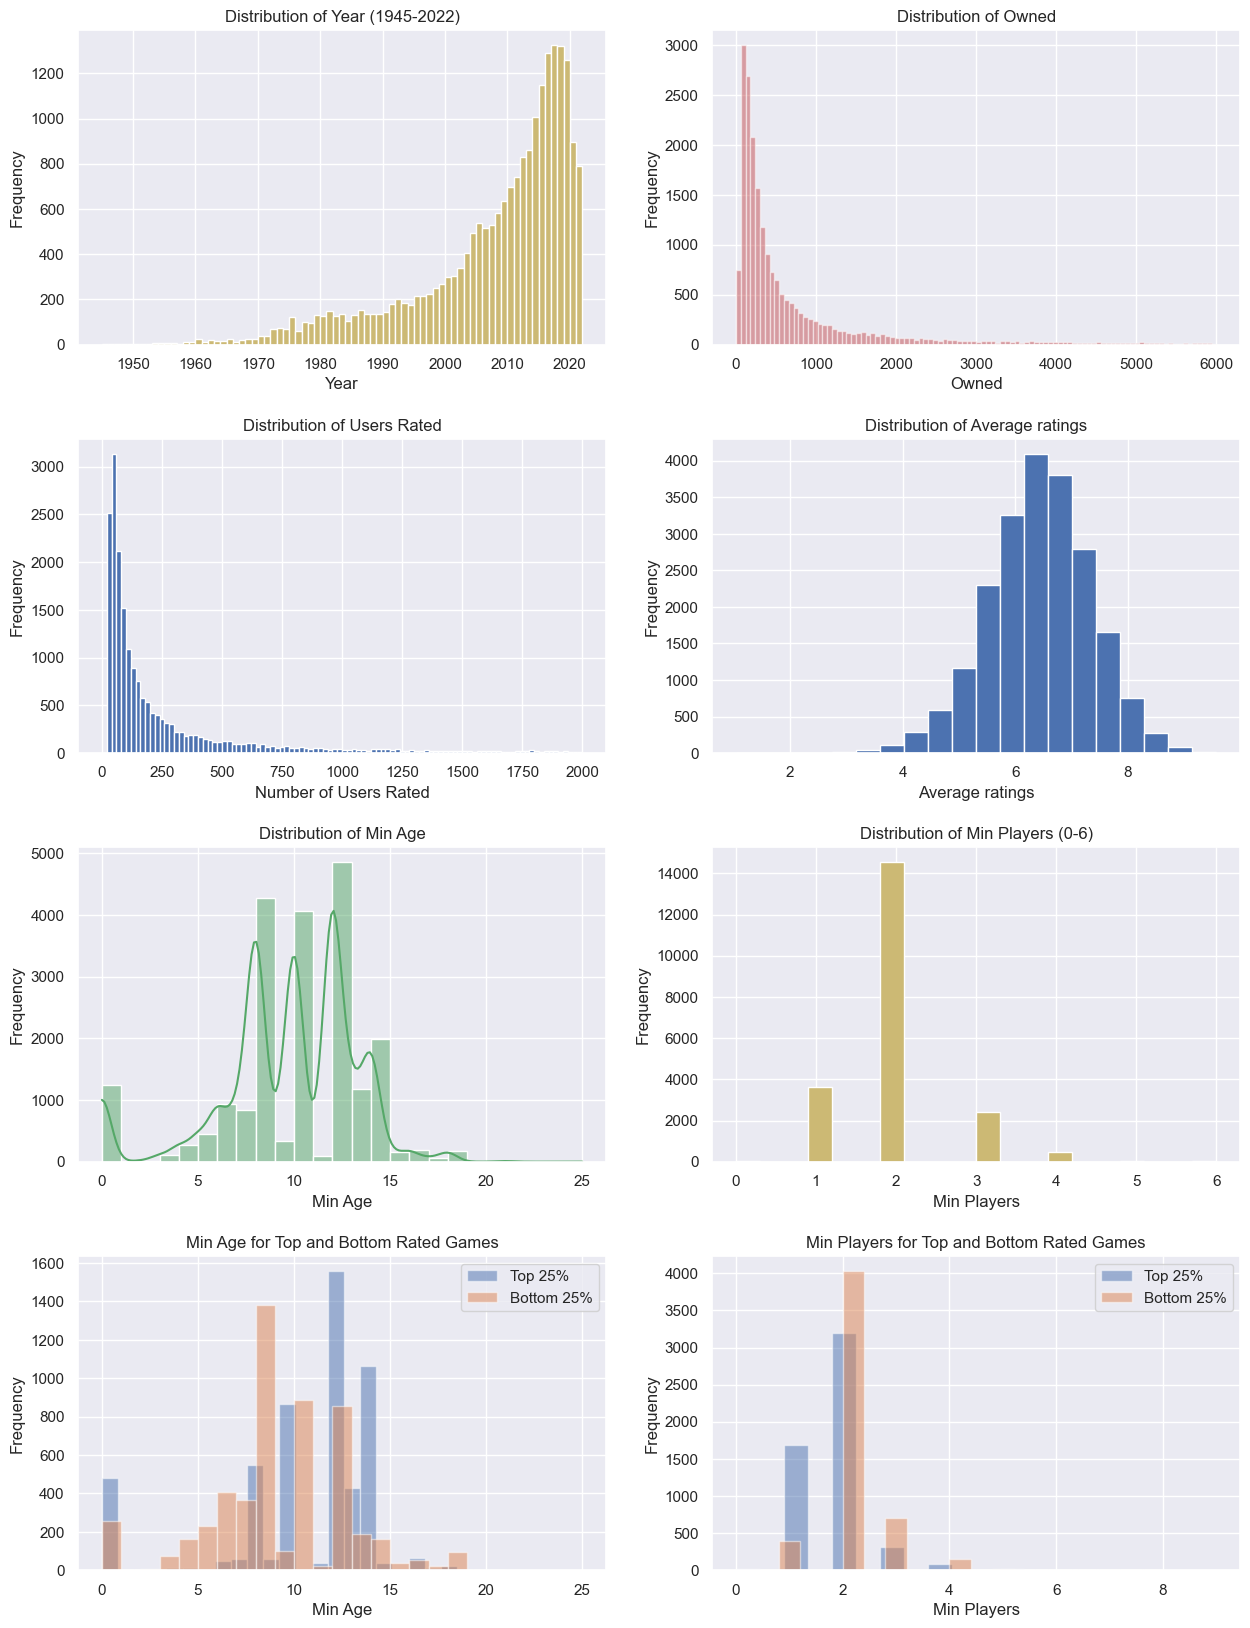

In [64]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20))


# Plot the distribution of yearpublished
axs[0, 0].hist(gdn['yearpublished'], bins=77, color='y', range=(1945, 2022))
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Year (1945-2022)')

# Distribution of owned
axs[0, 1].hist(gdn['owned'], bins=100, range=(0, 6000), color='r', alpha=0.5, label='Owned')
axs[0, 1].set_xlabel('Owned')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Owned')

# Plotting the distribution of users_rated
axs[1, 0].hist(gdn['users_rated'], bins=100, range=(0, 2000))
axs[1, 0].set_xlabel('Number of Users Rated')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Users Rated')

# Plot the distribution of average ratings
axs[1, 1].hist(gdn['average_ratings'], bins=20)
axs[1, 1].set_xlabel('Average ratings')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Average ratings')

# Plot the distribution of minAge
sns.histplot(gdn['minage'], kde=True, bins=25, color='g', ax=axs[2, 0])
axs[2, 0].set_xlabel('Min Age')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].set_title('Distribution of Min Age')

# Plot the distribution of maxPlayers
axs[2, 1].hist(gdn['minplayers'], bins=20, color='y', range=(0, 6))
axs[2, 1].set_xlabel('Min Players')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].set_title('Distribution of Min Players (0-6)')


# Calculate the quantile values
top_quantile = gdn['average_ratings'].quantile(0.75)
bottom_quantile = gdn['average_ratings'].quantile(0.25)

# Filter for the top 25% most highly rated games
top_group = gdn[gdn['average_ratings'] >= top_quantile]

# Filter for the lowest 25% rated games
bottom_group = gdn[gdn['average_ratings'] <= bottom_quantile]

# Plot the distribution of minage for the top group
axs[3, 0].hist(top_group['minage'], bins=25, alpha=0.5, label='Top 25%')
# Plot the distribution of minage for the bottom group
axs[3, 0].hist(bottom_group['minage'], bins=25, alpha=0.5, label='Bottom 25%')
axs[3, 0].set_xlabel('Min Age')
axs[3, 0].set_ylabel('Frequency')
axs[3, 0].set_title('Min Age for Top and Bottom Rated Games')
axs[3, 0].legend()

# Plot the distribution of minplayers for the top group
axs[3, 1].hist(top_group['minplayers'], bins=20, alpha=0.5, label='Top 25%')
# Plot the distribution of minplayers for the bottom group
axs[3, 1].hist(bottom_group['minplayers'], bins=20, alpha=0.5, label='Bottom 25%')

axs[3, 1].set_xlabel('Min Players')
axs[3, 1].set_ylabel('Frequency')
axs[3, 1].set_title('Min Players for Top and Bottom Rated Games')
axs[3, 1].legend()

# Decrease plot height by 30%
plt.rcParams['figure.figsize'] = (plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1] * 0.7)

# Increase spacing between subplots vertically
plt.subplots_adjust(hspace=0.3)

# Your code for creating and plotting the subplots goes here
plt.show()



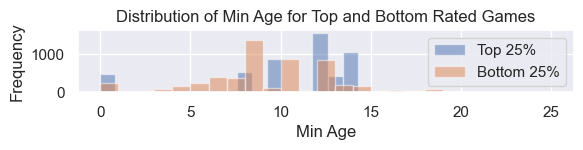

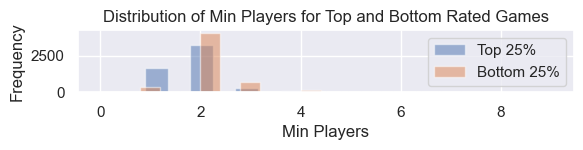

In [65]:
# Calculate the quantile values
top_quantile = gdn['average_ratings'].quantile(0.75)
bottom_quantile = gdn['average_ratings'].quantile(0.25)

# Filter for the top 25% most highly rated games
top_group = gdn[gdn['average_ratings'] >= top_quantile]

# Filter for the lowest 25% rated games
bottom_group = gdn[gdn['average_ratings'] <= bottom_quantile]

# Plot the distribution of minage for the top group
plt.hist(top_group['minage'], bins=25, alpha=0.5, label='Top 25%')
# Plot the distribution of minage for the bottom group
plt.hist(bottom_group['minage'], bins=25, alpha=0.5, label='Bottom 25%')

plt.xlabel('Min Age')
plt.ylabel('Frequency')
plt.title('Distribution of Min Age for Top and Bottom Rated Games')
plt.legend()
plt.show()

# Plot the distribution of minplayers for the top group
plt.hist(top_group['minplayers'], bins=20, alpha=0.5, label='Top 25%')
# Plot the distribution of minplayers for the bottom group
plt.hist(bottom_group['minplayers'], bins=20, alpha=0.5, label='Bottom 25%')

plt.xlabel('Min Players')
plt.ylabel('Frequency')
plt.title('Distribution of Min Players for Top and Bottom Rated Games')
plt.legend()
plt.show()

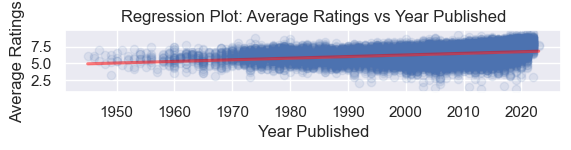

In [66]:
# how games publishing year relates to average_ratings 
sns.regplot(data=gdn, x='yearpublished', y='average_ratings', scatter_kws={'alpha':0.1}, line_kws={'color':'red', 'alpha':0.5})
plt.xlabel('Year Published')
plt.ylabel('Average Ratings')
plt.title('Regression Plot: Average Ratings vs Year Published')
plt.show()


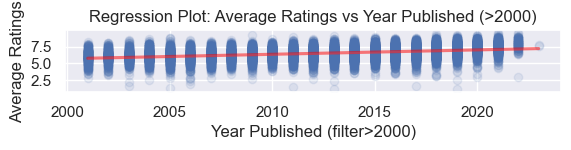

In [67]:
# how games publishing year relates to average_ratings, games after 2000    
filtered_df = gdn[gdn['yearpublished'] > 2000]
sns.regplot(data=filtered_df, x='yearpublished', y='average_ratings', scatter_kws={'alpha':0.1}, line_kws={'color':'red', 'alpha':0.5})
plt.xlabel('Year Published (filter>2000)')
plt.ylabel('Average Ratings')
plt.title('Regression Plot: Average Ratings vs Year Published (>2000)')
plt.show()


                          num_r  rank_ratings  average_ratings  \
num_r                  1.000000      1.000000        -0.948539   
rank_ratings           1.000000      1.000000        -0.948539   
average_ratings       -0.948539     -0.948539         1.000000   
bayes_average_ratings -0.916561     -0.916561         0.786623   
users_rated           -0.679465     -0.679465         0.494156   
yearpublished         -0.533682     -0.533682         0.617054   
minplayers             0.372593      0.372593        -0.447579   
maxplayers             0.139602      0.139602        -0.163023   
playingtime            0.008605      0.008605         0.040675   
minplaytime            0.049008      0.049008        -0.009494   
maxplaytime            0.008605      0.008605         0.040675   
minage                -0.481672     -0.481672         0.451790   
owned                 -0.690850     -0.690850         0.506136   
trading               -0.718266     -0.718266         0.515170   
wanting   

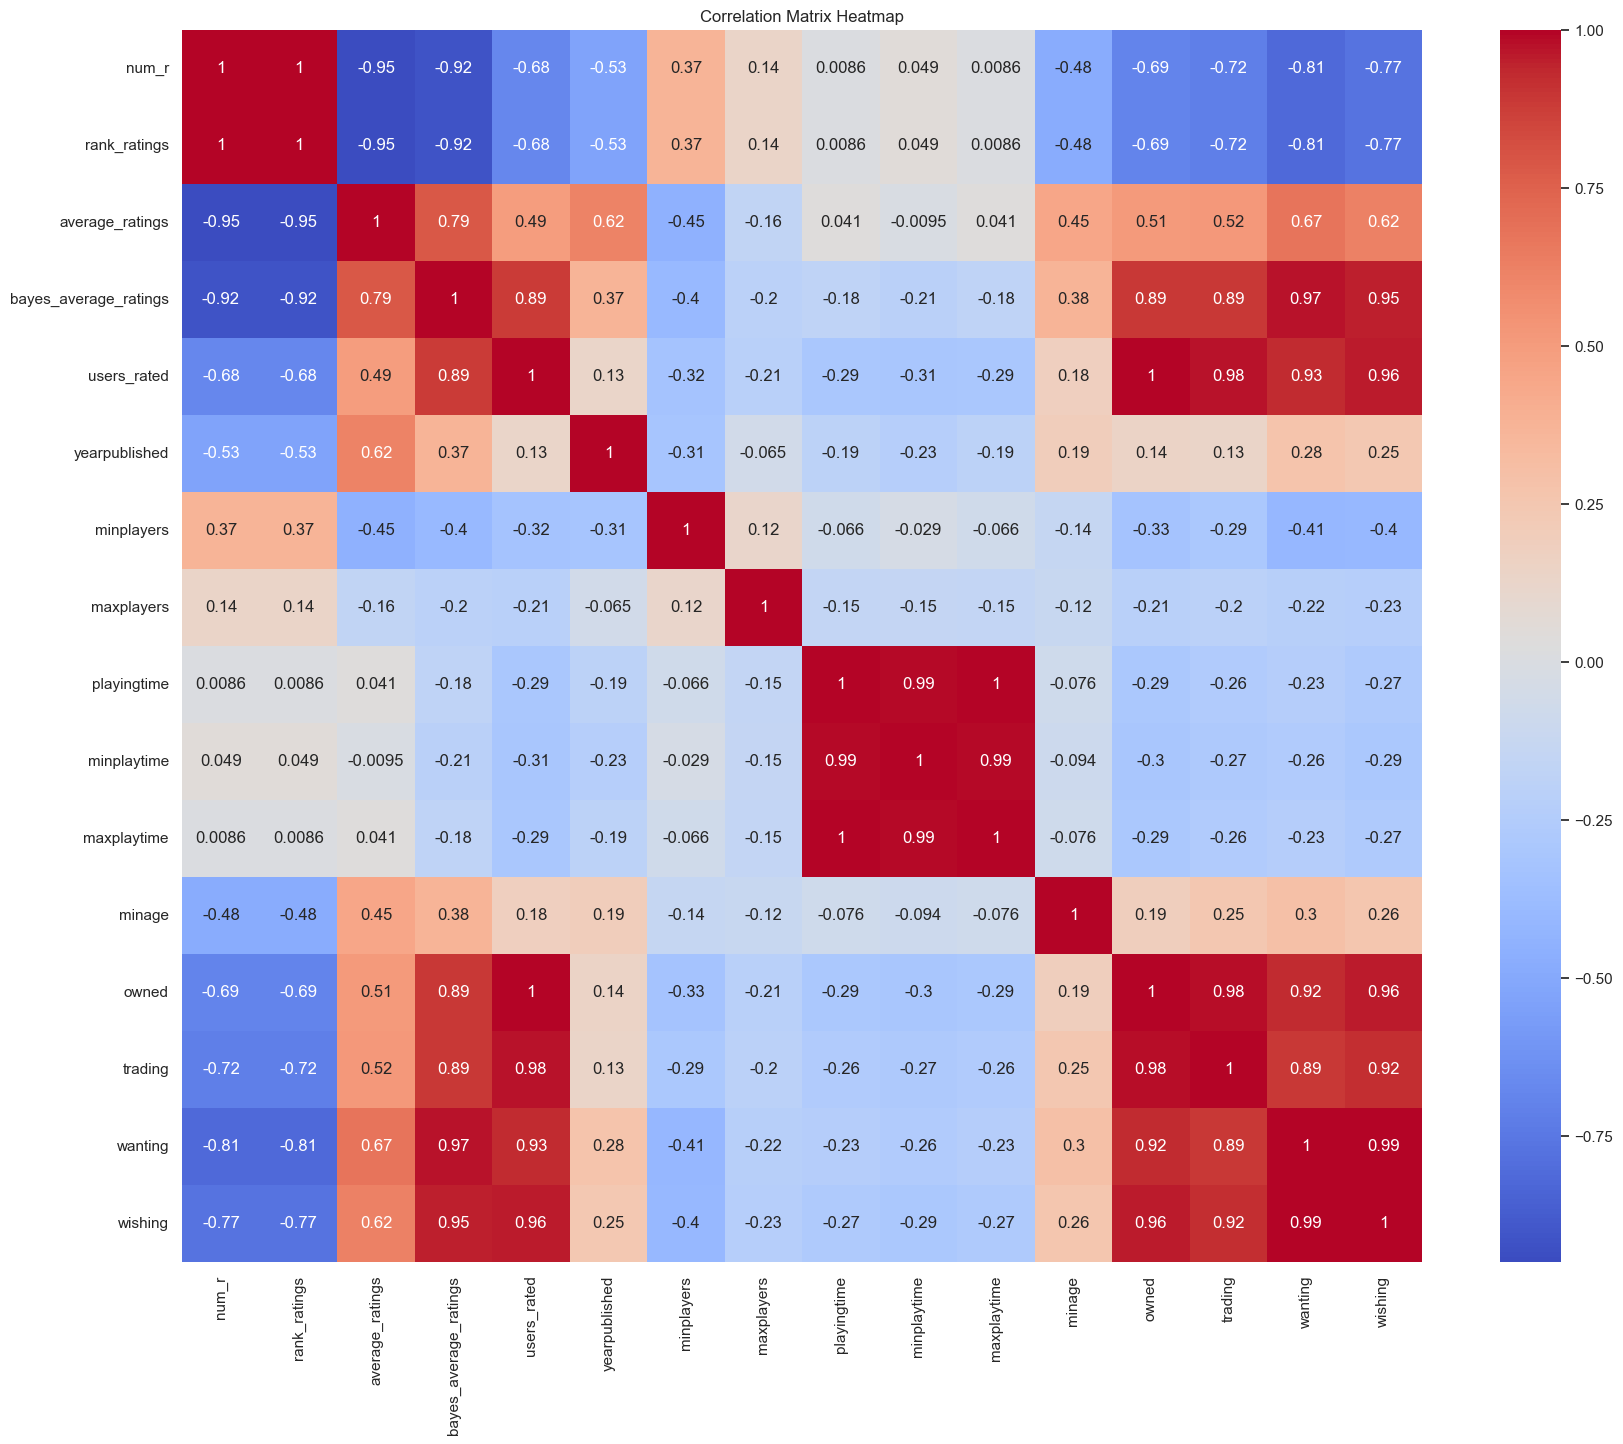

In [68]:
# for this correlation analysis, drop the columns id, num, num_ratings
gdn_corr = gdn.drop(['id', 'num' ], axis=1).corr()

correlation_matrix = gdn_corr.corr()
print(correlation_matrix)


plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



### Interpretation
The numbers are heavily relying on each other: ``owned`` with ``users_rated`` is 1:1, 

same for ``bayes_average_ratings`` which is derived from `average_ratings`. 

``owned``, ``trading``, ``wanting``, ``wishing`` are all related due to how the platform works and computes these numbers.

### Shift focus to the IVs that were described as relevant in background research.


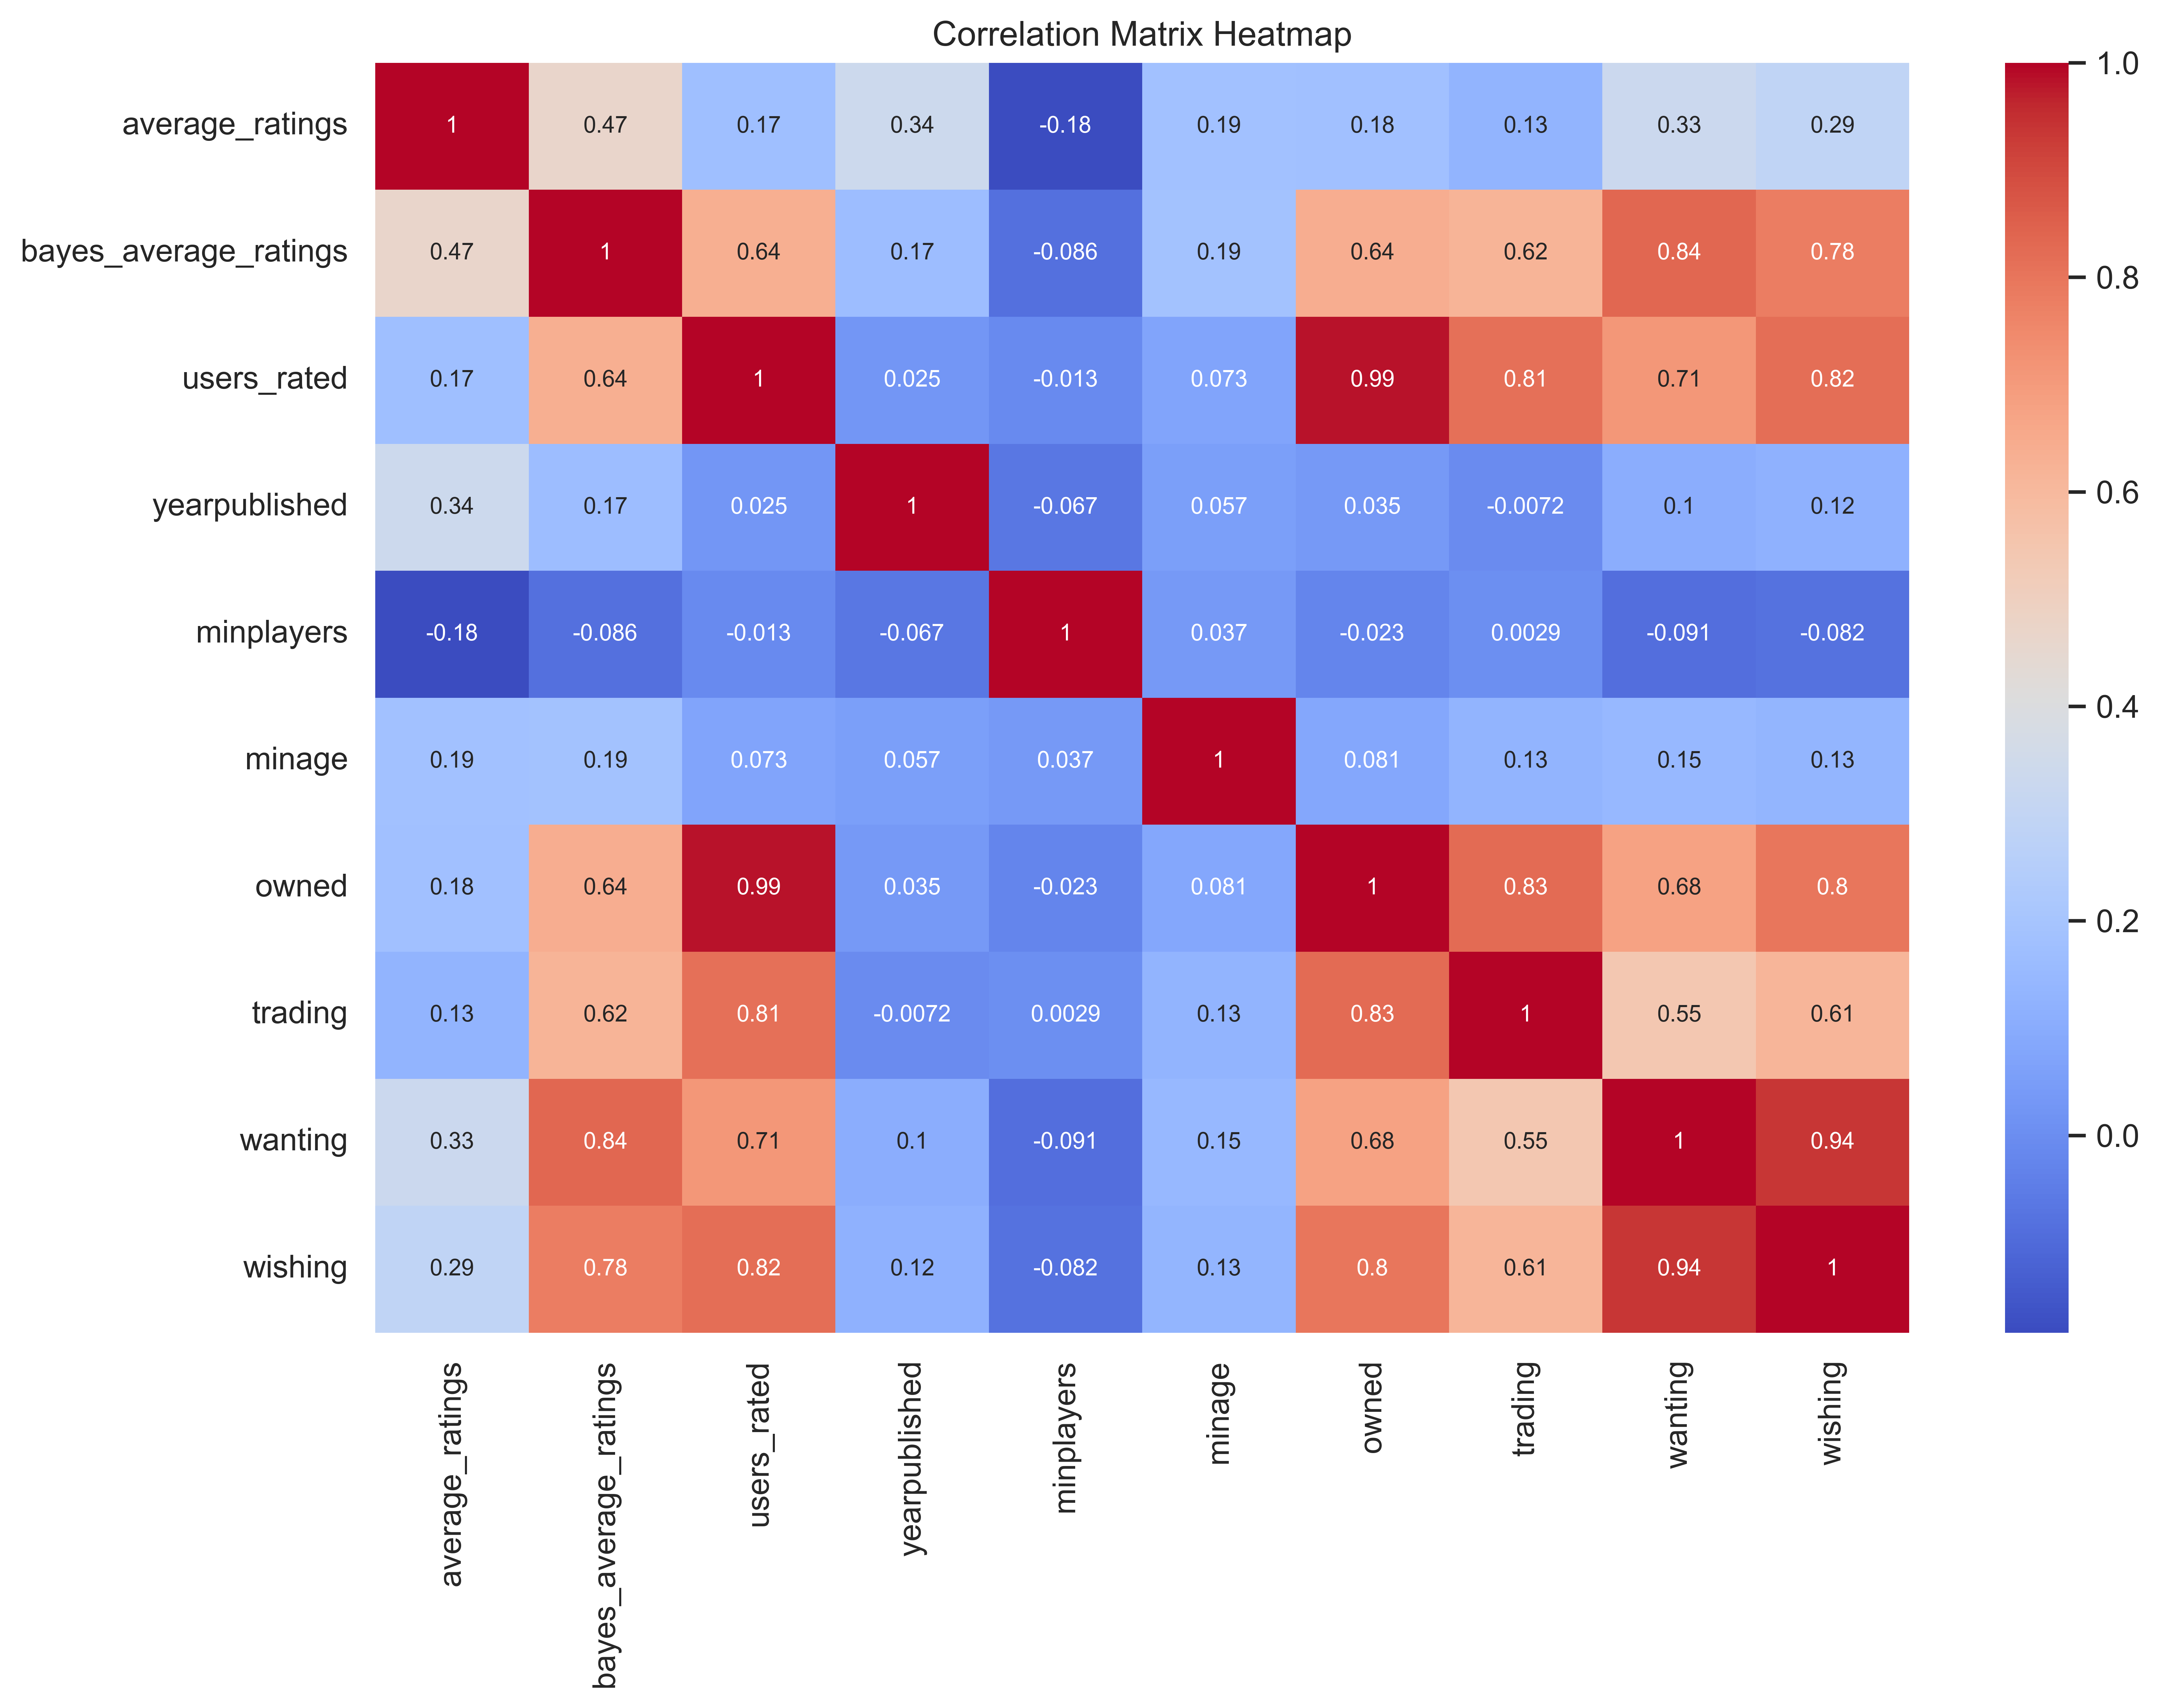

In [69]:
# for this correlation analysis, we focus our attention on a limited set of variables

correlation_matrix = gdn[[ "average_ratings", "bayes_average_ratings", "users_rated", "yearpublished", "minplayers", "minage",  "owned", "trading", "wanting", "wishing" ]].corr()
#print(correlation_matrix)

plt.figure(figsize=(12, 8), dpi=600)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.show()




#### Table confirms that there is no multiple collinearity problem between
* `minPlayers`, `usersRated`
* `minPlayers`, `yearPublished`
* `minPlayers`, `minAge`
* `minPlayers`, `users_rated`


There is between 
* `average_ratings`, `bayes_average_ratings`
* `wishing`, `wanting`
* `owned`, `wishing`, `trading`

#### We therefore do not need to control for certain variables in the case of ``average_rating``

In the case of ``bayes``, we can take users_rated which is a good predictor, but we would need either to eliminate, or control for owned, which would eliminate most of the added value.